# TIME-SERIES ANALYSIS

Investors are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.

You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months.

# Import modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

# Loading The DataSet

In [3]:
df= pd.read_csv('Train_SU63ISt.csv')

In [4]:
df

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [5]:
df=df.drop('ID', axis=1)

In [6]:
df.head()

,Datetime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  18288 non-null  object
 1   Count     18288 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 285.9+ KB


In [8]:
#convert datetime into date format
df['Datetime']= pd.to_datetime(df['Datetime'], format= '%d-%m-%Y %H:%M')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  18288 non-null  datetime64[ns]
 1   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 285.9 KB


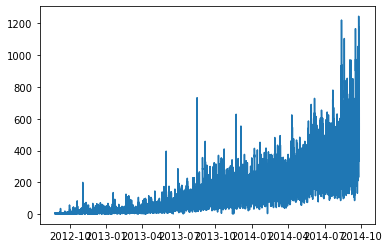

In [10]:
#EDA
plt.plot(df['Datetime'], df['Count'])

# Format the Data for the Model

In [11]:
df.index= df['Datetime']
df['y']=df['Count']
df.drop(columns=[ 'Datetime', 'Count'], axis=1, inplace=True)
df= df.resample('D').sum()
df

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [12]:
df['ds']= df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


# Checkpoint 1-formated

In [13]:
df_formated= df
df_formated

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29
...,...,...
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23


# INPUT SPLIT

In [15]:
size= 60
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_formated, test_size=size/len(df_formated), shuffle=False)

In [17]:
train.tail()

,y,ds
Datetime,,
2014-07-23,10130,2014-07-23
2014-07-24,8156,2014-07-24
2014-07-25,7192,2014-07-25
2014-07-26,6562,2014-07-26
2014-07-27,6094,2014-07-27


In [18]:
test.head()

,y,ds
Datetime,,
2014-07-28,8546,2014-07-28
2014-07-29,8218,2014-07-29
2014-07-30,8498,2014-07-30
2014-07-31,8740,2014-07-31
2014-08-01,9186,2014-08-01


# Model Training

In [34]:
model= Prophet(yearly_seasonality=True, seasonality_prior_scale=0.9)
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
# future prediction
future= model.make_future_dataframe(periods=60)
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
757,2014-09-21
758,2014-09-22
759,2014-09-23
760,2014-09-24


In [51]:
forecast= model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-473.732066,-1729.503851,147.525110,-473.732066,-473.732066,-341.012799,-341.012799,-341.012799,-846.187838,-846.187838,-846.187838,505.175040,505.175040,505.175040,0.0,0.0,0.0,-814.744865
1,2012-08-26,-466.733663,-1852.542509,41.210657,-466.733663,-466.733663,-457.255955,-457.255955,-457.255955,-967.168356,-967.168356,-967.168356,509.912400,509.912400,509.912400,0.0,0.0,0.0,-923.989618
2,2012-08-27,-459.735259,-460.308592,1406.280582,-459.735259,-459.735259,944.458519,944.458519,944.458519,431.253528,431.253528,431.253528,513.204990,513.204990,513.204990,0.0,0.0,0.0,484.723259
3,2012-08-28,-452.736856,-468.924179,1452.549892,-452.736856,-452.736856,954.762245,954.762245,954.762245,439.591890,439.591890,439.591890,515.170355,515.170355,515.170355,0.0,0.0,0.0,502.025389
4,2012-08-29,-445.738452,-434.550334,1482.894893,-445.738452,-445.738452,915.693928,915.693928,915.693928,399.762294,399.762294,399.762294,515.931634,515.931634,515.931634,0.0,0.0,0.0,469.955476


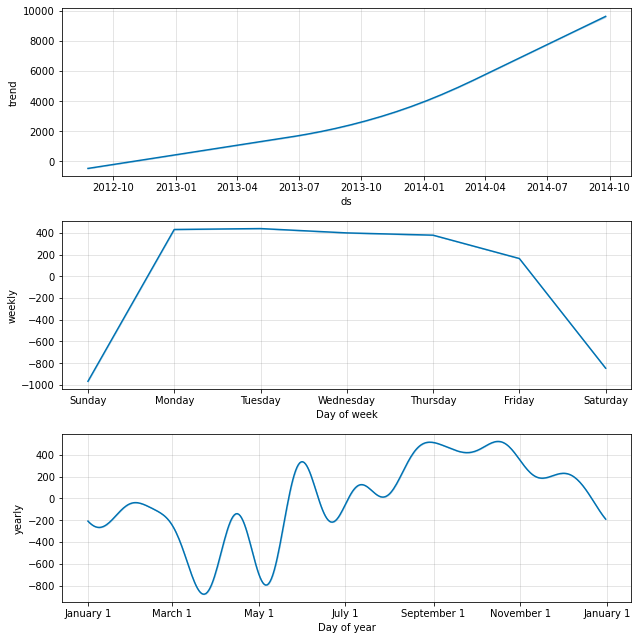

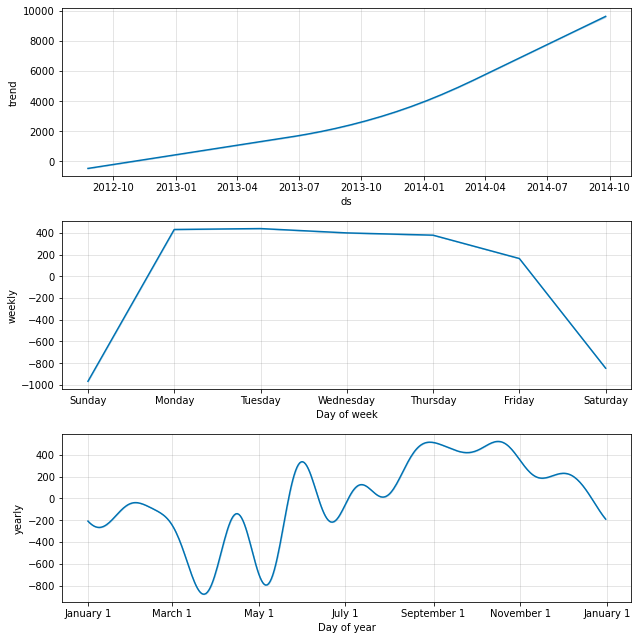

In [52]:
model.plot_components(forecast)

In [53]:
pred= forecast.iloc[-60:, :]
len(pred)

60

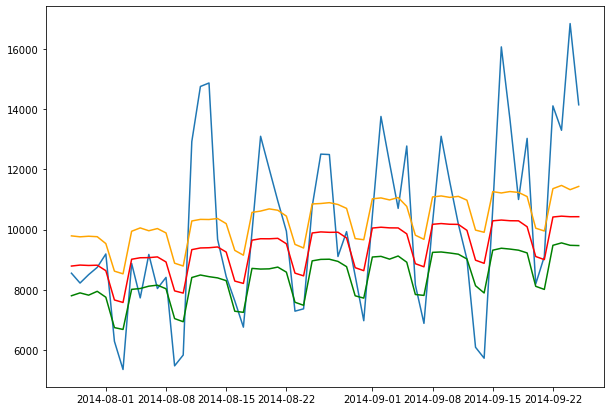

In [54]:
#test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'],test['y'] )
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')


plt.show()

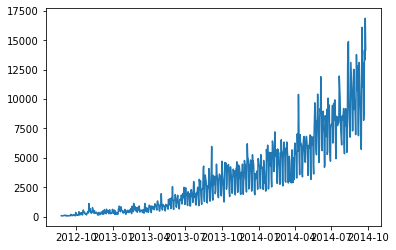

In [55]:
#input data
plt.plot(df_formated['ds'], df_formated['y'])
plt.show()

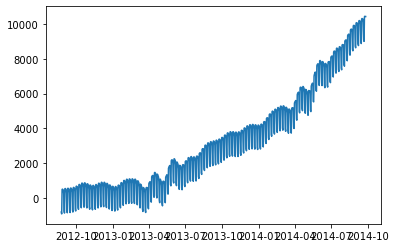

In [56]:
#forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()